# Imports

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

# Combining csv's

In [2]:
path = r'C:\Users\Noah Fontenette\Desktop\Data Analysis Practice\Webscraping\CFB Recruiting Rankings Analysis\dataset'
files = Path(path).glob('*.csv')

In [3]:
dfs = list()
for f in files:
    data = pd.read_csv(f)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)
    
df = pd.concat(dfs, ignore_index=True)

# Cleaning

#### Start

In [4]:
df

,date_w_accessed,date_ranked,ranking,team_name,five_stars,four_stars,three_stars,total_commits,avg_rating,avg_nil,on3_score,file
0,2022-08-05,2013,1,Alabama,6,16,3,25,92.61,-,94.452,2013_on3
1,2022-08-05,2013,2,Ohio State,1,19,3,23,92.57,-,93.228,2013_on3
2,2022-08-05,2013,3,Florida,3,16,7,27,90.64,-,92.522,2013_on3
3,2022-08-05,2013,4,Notre Dame,2,18,3,23,91.79,-,92.404,2013_on3
4,2022-08-05,2013,5,Michigan,0,19,7,28,90.23,-,92.026,2013_on3
...,...,...,...,...,...,...,...,...,...,...,...,...
545,2022-08-06,2023,46,Wake Forest,0,1,14,16,85.41,$7.4K,85.609,2023_on3
546,2022-08-06,2023,47,Auburn,0,5,1,6,90.26,$37K,85.607,2023_on3
547,2022-08-06,2023,48,Arizona,0,1,17,18,84.83,$12.8K,85.590,2023_on3
548,2022-08-06,2023,49,Purdue,0,0,17,17,85.19,$7.2K,85.568,2023_on3


In [5]:
df0 = df.sort_values('date_ranked', ascending=True)

In [6]:
df1 = df0.sort_values('ranking', ascending=True)


In [7]:
df2 = df1.drop(['date_w_accessed', 'file'], axis=1)

In [8]:
df2.head(10)

,date_ranked,ranking,team_name,five_stars,four_stars,three_stars,total_commits,avg_rating,avg_nil,on3_score
0,2013,1,Alabama,6,16,3,25,92.61,-,94.452
250,2018,1,Georgia,9,14,3,26,93.13,$93K,94.753
300,2019,1,Alabama,3,23,1,27,92.77,$84K,94.104
450,2022,1,Texas A&M,9,19,2,30,93.59,$48K,96.430
50,2014,1,Alabama,7,13,7,27,93.02,-,94.771
400,2021,1,Alabama,5,20,1,28,94.02,$80K,96.063
200,2017,1,Alabama,7,16,5,28,92.52,$30K,94.797
350,2020,1,Georgia,5,14,6,25,91.43,$146K,93.739
100,2015,1,Alabama,5,16,2,23,93.13,$12.6K,93.699
500,2023,1,Alabama,4,10,4,18,92.34,$147K,93.986


In [9]:
df2['avg_nil'] = df2['avg_nil'].str.replace('-', '$0')

In [10]:
df2['avg_nil'] = df2['avg_nil'].str.replace('$', '')

C:\Users\Noah Fontenette\AppData\Local\Temp\ipykernel_18976\1136273496.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['avg_nil'] = df2['avg_nil'].str.replace('$', '')


In [11]:
df2['avg_nil'] = df2['avg_nil'].str.replace('K', '')

In [12]:
df2['avg_nil'] = df2['avg_nil'].astype(float)

In [13]:
dataf = df2

## Finsh Cleaning

In [14]:
dataf

,date_ranked,ranking,team_name,five_stars,four_stars,three_stars,total_commits,avg_rating,avg_nil,on3_score
0,2013,1,Alabama,6,16,3,25,92.61,0.0,94.452
250,2018,1,Georgia,9,14,3,26,93.13,93.0,94.753
300,2019,1,Alabama,3,23,1,27,92.77,84.0,94.104
450,2022,1,Texas A&M,9,19,2,30,93.59,48.0,96.430
50,2014,1,Alabama,7,13,7,27,93.02,0.0,94.771
...,...,...,...,...,...,...,...,...,...,...
449,2021,50,Virginia Tech,0,1,26,29,84.24,22.0,85.420
399,2020,50,USC,0,5,7,12,86.93,30.0,84.189
199,2016,50,NC State,1,1,21,23,82.99,13.9,83.715
499,2022,50,Jackson State,1,1,2,8,90.85,120.0,85.885


In [15]:
clean0 = dataf[dataf['team_name']=='Georgia'].sort_values('date_ranked', ascending=False).total_commits.sum()
clean0

274

# Math

In [16]:
dataf.describe()

,date_ranked,ranking,five_stars,four_stars,three_stars,total_commits,avg_rating,avg_nil,on3_score
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,2018.000000,25.500000,0.765455,7.629091,12.718182,22.063636,87.508855,29.097636,88.029455
std,3.165156,14.444007,1.333841,5.217725,6.152778,4.337067,2.522940,35.650179,2.724037
min,2013.000000,1.000000,0.000000,0.000000,0.000000,6.000000,82.340000,0.000000,83.715000
25%,2015.000000,13.000000,0.000000,4.000000,8.000000,20.000000,85.532500,0.000000,85.874750
50%,2018.000000,25.500000,0.000000,6.000000,13.000000,22.000000,87.120000,21.000000,87.395000
75%,2021.000000,38.000000,1.000000,11.000000,18.000000,25.000000,89.520000,38.000000,90.043250
max,2023.000000,50.000000,9.000000,24.000000,26.000000,37.000000,94.940000,330.000000,96.430000


In [17]:
tcbt = dataf.groupby('team_name').total_commits.mean().reset_index(name='avgtc')
tcbt1 = tcbt.sort_values(['avgtc'], ascending=False)

In [18]:
tcbt1.head(10)

,team_name,avgtc
22,Kansas,33.000000
60,USF,28.000000
17,Illinois,27.000000
10,Colorado,26.666667
44,Oregon State,25.000000
67,Washington State,25.000000
14,Georgia,24.909091
0,Alabama,24.636364
3,Arkansas,24.454545
7,California,24.142857


In [19]:
mtc = dataf[['team_name', 'total_commits']]
mtc0 = mtc.sort_values(['total_commits'], ascending=False)
mtc0.head(10)

,team_name,total_commits
116,South Carolina,37
28,Arkansas,35
46,Kansas,33
54,Tennessee,32
161,UCLA,32
179,Utah,32
224,Colorado,31
104,Georgia,31
84,NC State,31
93,Indiana,31


In [20]:
dataf

,date_ranked,ranking,team_name,five_stars,four_stars,three_stars,total_commits,avg_rating,avg_nil,on3_score
0,2013,1,Alabama,6,16,3,25,92.61,0.0,94.452
250,2018,1,Georgia,9,14,3,26,93.13,93.0,94.753
300,2019,1,Alabama,3,23,1,27,92.77,84.0,94.104
450,2022,1,Texas A&M,9,19,2,30,93.59,48.0,96.430
50,2014,1,Alabama,7,13,7,27,93.02,0.0,94.771
...,...,...,...,...,...,...,...,...,...,...
449,2021,50,Virginia Tech,0,1,26,29,84.24,22.0,85.420
399,2020,50,USC,0,5,7,12,86.93,30.0,84.189
199,2016,50,NC State,1,1,21,23,82.99,13.9,83.715
499,2022,50,Jackson State,1,1,2,8,90.85,120.0,85.885


In [21]:
tcpt0 = dataf['team_name']
tcpt0

0            Alabama
250          Georgia
300          Alabama
450        Texas A&M
50           Alabama
           ...      
449    Virginia Tech
399              USC
199         NC State
499    Jackson State
549    Virginia Tech
Name: team_name, Length: 550, dtype: object

In [22]:
dataf[dataf['team_name']=='Alabama'].total_commits.sum()

271

In [23]:
tcpt = dataf.groupby(["team_name"]).total_commits.sum().reset_index().sort_values('total_commits', ascending=False)
tcpt.describe()

,total_commits
count,70.000000
mean,173.357143
std,81.994527
min,17.000000
25%,108.250000
50%,206.500000
75%,237.500000
max,274.000000


In [24]:
tcpt.head(10)

,team_name,total_commits
14,Georgia,274
0,Alabama,271
3,Arkansas,269
55,Texas A&M,262
53,Tennessee,260
54,Texas,258
38,Notre Dame,252
40,Oklahoma,250
28,Michigan,249
39,Ohio State,249


In [25]:
cp1 = tcpt.nsmallest(10, 'total_commits').sort_values('total_commits', ascending=False)
cp1

,team_name,total_commits
65,Wake Forest,40
22,Kansas,33
60,USF,28
17,Illinois,27
44,Oregon State,25
57,UCF,24
21,Jackson State,23
16,Houston,21
51,Syracuse,20
36,Northern Iowa,17


In [26]:
cp0 = tcpt.nlargest(10, 'total_commits')
cp0

,team_name,total_commits
14,Georgia,274
0,Alabama,271
3,Arkansas,269
55,Texas A&M,262
53,Tennessee,260
54,Texas,258
38,Notre Dame,252
40,Oklahoma,250
28,Michigan,249
39,Ohio State,249


[(100.0, 300.0),
 Text(0.5, 1.0, 'Top 10 Teams with Most Commits (Past 10 Years)')]

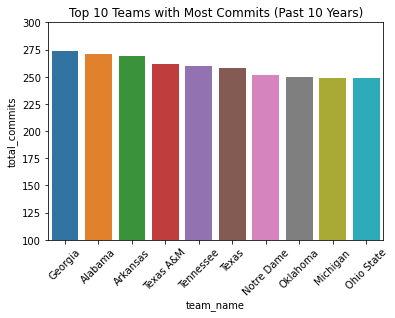

In [27]:
cp = sns.barplot(x=cp0.team_name,y=cp0.total_commits)
plt.xticks(rotation = 45)
cp.set(ylim=(100,300), title=('Top 10 Teams with Most Commits (Past 10 Years)'))

In [28]:
mfs = dataf.groupby(["team_name"]).five_stars.sum().reset_index().sort_values('five_stars', ascending=False)
mfs

,team_name,five_stars
0,Alabama,52
14,Georgia,39
39,Ohio State,30
9,Clemson,29
55,Texas A&M,21
...,...,...
6,Boston College,0
57,UCF,0
56,Texas Tech,0
8,Cincinnati,0


In [29]:
mfcp = mfs.nlargest(10, 'five_stars')
mfcp

,team_name,five_stars
0,Alabama,52
14,Georgia,39
39,Ohio State,30
9,Clemson,29
55,Texas A&M,21
24,LSU,20
59,USC,20
13,Florida State,16
45,Penn State,12
12,Florida,11


In [30]:
mfcpl = mfs.nsmallest(14, 'five_stars')
mfcpl['team_name']

15        Georgia Tech
67    Washington State
37        Northwestern
65         Wake Forest
22              Kansas
44        Oregon State
61                Utah
36       Northern Iowa
47              Purdue
6       Boston College
57                 UCF
56          Texas Tech
8           Cincinnati
20          Iowa State
Name: team_name, dtype: object

In [31]:
osco = dataf.groupby(["team_name"]).on3_score.sum().reset_index().sort_values('on3_score', ascending=False)
osco

,team_name,on3_score
0,Alabama,1035.296
39,Ohio State,1021.621
14,Georgia,1019.837
24,LSU,1008.403
55,Texas A&M,1002.376
...,...,...
16,Houston,85.050
51,Syracuse,84.922
17,Illinois,84.366
22,Kansas,84.315


In [32]:
osl = osco.nlargest(10, 'on3_score')
osl

,team_name,on3_score
0,Alabama,1035.296
39,Ohio State,1021.621
14,Georgia,1019.837
24,LSU,1008.403
55,Texas A&M,1002.376
9,Clemson,999.431
38,Notre Dame,999.092
54,Texas,997.281
40,Oklahoma,994.936
59,USC,993.982


In [33]:
oss = osco.nsmallest(10, 'on3_score').sort_values('on3_score', ascending=False)
oss

,team_name,on3_score
57,UCF,172.049
65,Wake Forest,169.639
67,Washington State,167.867
44,Oregon State,85.283
60,USF,85.147
16,Houston,85.050
51,Syracuse,84.922
17,Illinois,84.366
22,Kansas,84.315
36,Northern Iowa,84.119


# Questions 

### Question #1: Which Team has the most commits during a recruiting period in the past 10 years?

South Carolina

### Question #2: Which Team has the most commits on average during a recruiting period in the past 10 years?

Kansas

### Question #3 Which Team has the most commits in the past 10 years?

Georgia

### Question #4 Which Team has the least commits in the past 10 years?

Northern Iowa

### Question #5 Which Team has the most five star recruits for the past 10 years?

Alabama

### Question #6 Which Teams have the least five star recurits for the past 10 years?

Georgia Tech, Washington State, Northwestern, Wake Forest, Kansas, Oregon State, Utah, Northern Iowa, Purdue, Boston College, UCF, Texas Tech, Cincinnati, Iowa State

### Question #7 Which team has the highest on3 score?

Alabama

### Question #8 Which team has the lowest on3 score?

Northern Iowa

### Question #9 What is Oregon State's on3 Score for the past 10 years?

85.283

# Graphs

[(100.0, 300.0),
 Text(0.5, 1.0, 'Top 10 Teams with Most Commits (Past 10 Years)')]

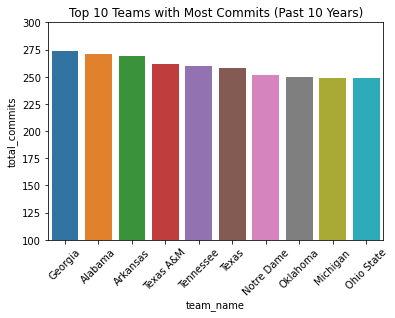

In [34]:
cp = sns.barplot(x=cp0.team_name,y=cp0.total_commits)
plt.xticks(rotation = 45)
cp.set(ylim=(100,300), title=('Top 10 Teams with Most Commits (Past 10 Years)'))

[(10.0, 45.0),
 Text(0.5, 1.0, 'Top 10 Teams with Least Commits (Past 10 Years)')]

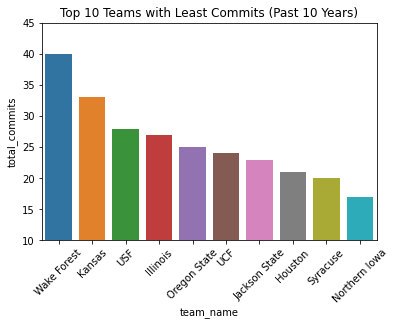

In [35]:
cpl = sns.barplot(x=cp1.team_name,y=cp1.total_commits)
plt.xticks(rotation = 45)
cpl.set(ylim=(10,45), title=('Top 10 Teams with Least Commits (Past 10 Years)'))

[Text(0, 0, '52'),
 Text(0, 0, '39'),
 Text(0, 0, '30'),
 Text(0, 0, '29'),
 Text(0, 0, '21'),
 Text(0, 0, '20'),
 Text(0, 0, '20'),
 Text(0, 0, '16'),
 Text(0, 0, '12'),
 Text(0, 0, '11')]

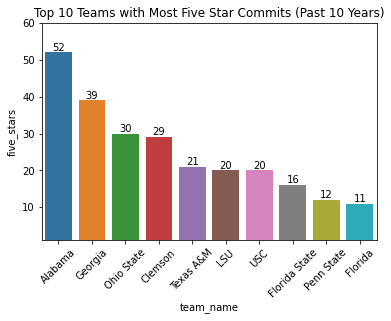

In [36]:
cpfs = sns.barplot(x=mfcp.team_name,y=mfcp.five_stars)
plt.xticks(rotation = 45)
cpfs.set(ylim=(1,60), title=('Top 10 Teams with Most Five Star Commits (Past 10 Years)'))
cpfs.bar_label(cpfs.containers[0])

[(990.0, 1040.0),
 Text(0.5, 1.0, 'Top 10 Teams with the Highest on3 Score (Past 10 Years)')]

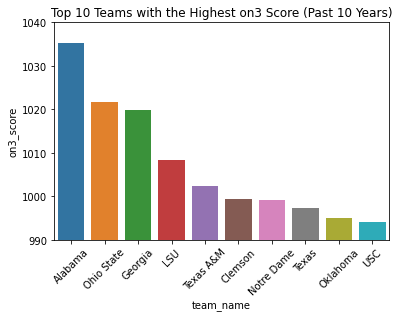

In [37]:
oscog1 = sns.barplot(x=osl.team_name,y=osl.on3_score)
plt.xticks(rotation = 45)
oscog1.set(ylim=(990,1040), title=('Top 10 Teams with the Highest on3 Score (Past 10 Years)'))

[(80.0, 180.0),
 Text(0.5, 1.0, 'Top 10 Teams with the Lowest on3 Score (Past 10 Years)')]

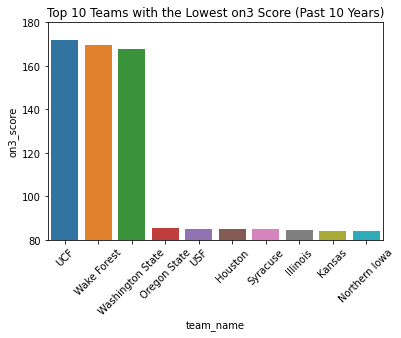

In [38]:
oscog2 = sns.barplot(x=oss.team_name,y=oss.on3_score)
plt.xticks(rotation = 45)
oscog2.set(ylim=(80,180), title=('Top 10 Teams with the Lowest on3 Score (Past 10 Years)'))